==========================================

### Andhika Abdurachim Nafis

### HCK-007

### Program ini bertujuan untuk menyelesaikan suatu permasalahan, analisa data menggunakan statistik deskriptif dan inferensial,dan dashboard visualisasi data untuk melengkapi tugas Milestone.

==========================================

# Link Tableau

https://public.tableau.com/shared/QH4W2DPCT?:display_count=n&:origin=viz_share_link

# A. Identifikasi Masalah

#### Latar Belakang Dari Topik Permasalahan

Saya adalah analyst yang ingin terjun kedalam dunia Dota 2 sebagai Official Analyst dalam organisasi profesional Dota 2. Dota 2 adalah permainan strategi dan taktik yang sangat populer dan memiliki komunitas yang besar. Dalam game ini, faktor seperti pemilihan karakter harus di pikirkan secara strategis, karena hero yang mengikuti META merupakan salah satu faktor penting dalam mencapai kemenangan. 

#### SMART 

- Specific: Memahami pemilihan hero, serta dampak Primary Attribute dan Attack Type terhadap Win Rate, dan juga mengidentifikasi hero dengan role dan status niche kepada tingkat Win Rate.

- Measurable: Rata-rata Win Rate dari Primary Attribute,  Attack Type, dan Roles di antara hero-hero yang dipilih.

- Achievable: Menggunakan teknik statistik dan metode visualisasi data, dan mendapatkan informasi mengenai Rata-rata Win Rate dari Primary Attribute,  Attack Type, dan Roles di antara hero-hero yang dipilih itu sangat memungkinkan. 

- Relevant: Mengetahui informasi rata-rata Win Rate dari Primary Attribute, Attack Type, dan Roles di masing masing hero itu Relevan bagi tim esport, dan peneliti yang tertarik untuk memahami pola pemilihan hero dalam ranah kompetitif. 

- Time-bound: Analisis ini akan diselesaikan dalam 6 hari kedepan,dan akan di implementasikan setelah ada nya hasil dari analisa.

#### Problem Statement: 

Analisis ini akan diselesaikan dalam waktu 6 hari, dan bertujuan untuk memahami pemilihan hero yang optimal untuk pertandingan kompetitif Dota 2, beberapa hal yang akan di analisa adalah hubungan variabel diantaranya adalah, atribut utama, tipe serangan hero,terhadap win rate.

#### 5W + 1 H

1. What: Apakah Hero dengan Primary Attribute tertentu memiliki Win Rate yang lebih tinggi dari yang lain ? (Statistik Deskriptif & Visualisasi)

2. What: Apakah ada hubungan antara Attack Type dan Win Rate? (Statistik Deskriptif dan Inferensial)

3. What: Apa kombinasi role yang paling umum di antara hero ? (Visualisasi)

4. What: Apakah memilih kombinasi role yang paling umum menentukan Win Rate yang tinggi ? (Deskriptif & Visualisasi)

5. Who: Hero Apa saja yang memiliki nilai Total Pro Wins ? (Visualisasi & Deskriptif)

6. What: Apakah hero dengan status "Niche Hero" memiliki Win Rate yang lebih tinggi dari hero dengan status "Non Niche Hero" ? (Visualisasi)

#### Penjelasan Istilah

Pada analisa dan pembahasan dibawah, akan ada beberapa istilah asing, yang akan dijelaskan dalam Markdown ini, seperti:

- Meta: Most Effective Tactic Available atau lebih dikenal dengan META, mencakup banyak aspek, contohnya: pilihan hero, pemilihan item, dll. Dalam kasus Dota 2, META itu keadaan dan keseimbangan antar hero yang dibuat oleh developer game.

# B. Data Loading

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats as stats
from scipy.stats import f_oneway

In [2]:
df = pd.read_csv('Current_Pro_meta.csv')
df = df.drop(df.columns[0], axis = 1) # Hilangkan row "index"
#df = df.set_index('Name') #Jadikan row 'Name' sebagai Index
df.head()

,Name,Primary Attribute,Attack Type,Attack Range,Roles,Total Pro wins,Times Picked,Times Banned,Win Rate,Niche Hero?
0,Abaddon,all,Melee,150,"Support, Carry, Durable",15,34,80,44.12,False
1,Alchemist,str,Melee,150,"Carry, Support, Durable, Disabler, Initiator, ...",48,109,75,44.04,False
2,Ancient Apparition,int,Ranged,675,"Support, Disabler, Nuker",27,53,62,50.94,False
3,Anti-Mage,agi,Melee,150,"Carry, Escape, Nuker",57,124,479,45.97,False
4,Arc Warden,agi,Ranged,625,"Carry, Escape, Nuker",9,19,58,47.37,False


Penjelasan mengenai kolom di atas:
- Nama hero: dari huruf A seperti Abaddon, sampai Z seperti Zeus.
- Primary Attribute: terdiri berisikan oleh 4 attribute yaitu: all(universall),str(strength),int(intelegence), dan agi(agility)
- Attack Type: seperti Melee (Jarak Dekat) dan Ranged (Jarak Jauh)
- Roles/Peran: terdiri dari banyak ketegori, tapi utamanya adalah Support, Carry, Disabler (yang bisa disable musuh dengan skill stun atau slow), dan durable (yang bisa bertahan lama dalam situasi pertempuran antar team)
- Total Pro Wins: jumlah kemenangan pro player menggunakan hero tersebut.
- Times Picked: jumlah terpilih nya hero itu dalam pertandingan.
- Times Banned: Jumlah terban nya hero itu dalam pertandingan profesional.
- Win Rate: Persentase rata rata kemenangan hero tersebut dalam META ini. 
- Niche Hero?: Sebuah hero dianggap "niche" ketika memiliki tingkat ban rate yang rendah, tingkat pick rate yang rendah, dan tingkat kemenangan/win rate yang rendah hingga sedang (45%-55%)


In [3]:
df.shape

(124, 10)

- Terdapat 124 rows, dan 10 columns dalam data ini

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               124 non-null    object 
 1   Primary Attribute  124 non-null    object 
 2   Attack Type        124 non-null    object 
 3   Attack Range       124 non-null    int64  
 4   Roles              124 non-null    object 
 5   Total Pro wins     124 non-null    int64  
 6   Times Picked       124 non-null    int64  
 7   Times Banned       124 non-null    int64  
 8   Win Rate           124 non-null    float64
 9   Niche Hero?        124 non-null    bool   
dtypes: bool(1), float64(1), int64(4), object(4)
memory usage: 9.0+ KB


- Semua data type sudah sesuai, dimana untuk kolom 'Attack Range', dan kolom yang tercantum 'Picked' dan 'Wins' data type nya adalah int64
- Khusus untuk kolom yang bernama 'Win Rate', datatype nya adalah float64, karena output nya adalah persentase kemenangan
- Sedangkan untuk kolom 'Niche Hero?' Datatype nya itu adalah bool, karena output dari kolom 'Niche Hero?' adalah True/False

In [5]:
df['Name'].sort_values() # Memunculkan semua value dalam kolom 'Name'

0                 Abaddon
1               Alchemist
2      Ancient Apparition
3               Anti-Mage
4              Arc Warden
              ...        
119            Windranger
120         Winter Wyvern
121          Witch Doctor
122           Wraith King
123                  Zeus
Name: Name, Length: 124, dtype: object

In [6]:
# visualisasi label count di setiap kolom yang ingin di panggil
for i in ['Roles', 'Primary Attribute','Attack Type','Niche Hero?']:
    print(i, ':')
    print(df[i].value_counts())
    print('-'*50)

Roles :
Support, Nuker, Disabler                      4
Support, Disabler, Nuker                      4
Support, Nuker, Disabler, Escape              4
Carry, Disabler, Initiator, Durable, Nuker    3
Carry, Nuker, Disabler                        3
                                             ..
Support, Nuker, Pusher, Disabler              1
Support, Escape, Nuker                        1
Carry, Nuker, Disabler, Escape, Pusher        1
Carry, Durable, Initiator                     1
Nuker, Carry                                  1
Name: Roles, Length: 102, dtype: int64
--------------------------------------------------
Primary Attribute :
all    31
str    31
int    31
agi    31
Name: Primary Attribute, dtype: int64
--------------------------------------------------
Attack Type :
Ranged    64
Melee     60
Name: Attack Type, dtype: int64
--------------------------------------------------
Niche Hero? :
False    105
True      19
Name: Niche Hero?, dtype: int64
------------------------------

- Kombinasi role yang paling banyak adalah:
    - Support, Nuker, Disabler
    - Support, Disabler, Nuker
    - Support, Nuker, Disabler, Escape
- Primary Attribute memiliki value counts yang imbang
- Attack Type yang paling dominan dalam hero Dota 2 adalah Ranged(Jarak Jauh)
- Mayoritas dari hero Dota 2 tidak termaksud dalam kategori Niche, ini bisa di artikan bahwa kebanyakan hero Dota 2 memiliki ban rate, pick rate, dan win rate yang tinggi


# C. Data Cleaning

In [7]:
df.isnull().sum() # Memberikan informasi mengenai jumlah null dalam tiap kolom

Name                 0
Primary Attribute    0
Attack Type          0
Attack Range         0
Roles                0
Total Pro wins       0
Times Picked         0
Times Banned         0
Win Rate             0
Niche Hero?          0
dtype: int64

In [8]:
df.isna().sum() # Memberikan informasi mengenai jumlah na dalam tiap kolom

Name                 0
Primary Attribute    0
Attack Type          0
Attack Range         0
Roles                0
Total Pro wins       0
Times Picked         0
Times Banned         0
Win Rate             0
Niche Hero?          0
dtype: int64

In [9]:
df.duplicated().sum() # Memberikan informasi mengenai jumlah value yang duplikat dalam tiap kolom

0

- 2 test diatas, mengindikasikan bahwa tidak terdapat Missing Value, dan tidak ada juga value yang duplikat dalam dataset ini

In [10]:
# Check untuk whitespace pada keseluruhan dataset
contains_whitespace = df.apply(lambda x: x.astype(str).str.isspace().any())
whitespace_columns = contains_whitespace[contains_whitespace].index.tolist()

print("Columns with whitespace:")
print(whitespace_columns)

Columns with whitespace:
[]


- Setelah dijalankan kode diatas, bisa disumpulkan bahwa tidak terdapat White Space pada dataset ini

Saya sudah mencoba untuk melakukan Data Cleaning menggunakan beberapa metode, memang tidak ada missing value, value yang duplikat,dan white space pada dataset ini, dataset ini sudah bersih.

# D. Analisis dan perhitungan

## 1. Apakah Hero dengan Primary Attribute tertentu memiliki Win Rate yang lebih tinggi dari yang lain ?

##### a. Distribusi Primary Attribute

In [11]:
primary_attribute_counts = df['Primary Attribute'].value_counts() 
primary_attribute_counts

all    31
str    31
int    31
agi    31
Name: Primary Attribute, dtype: int64

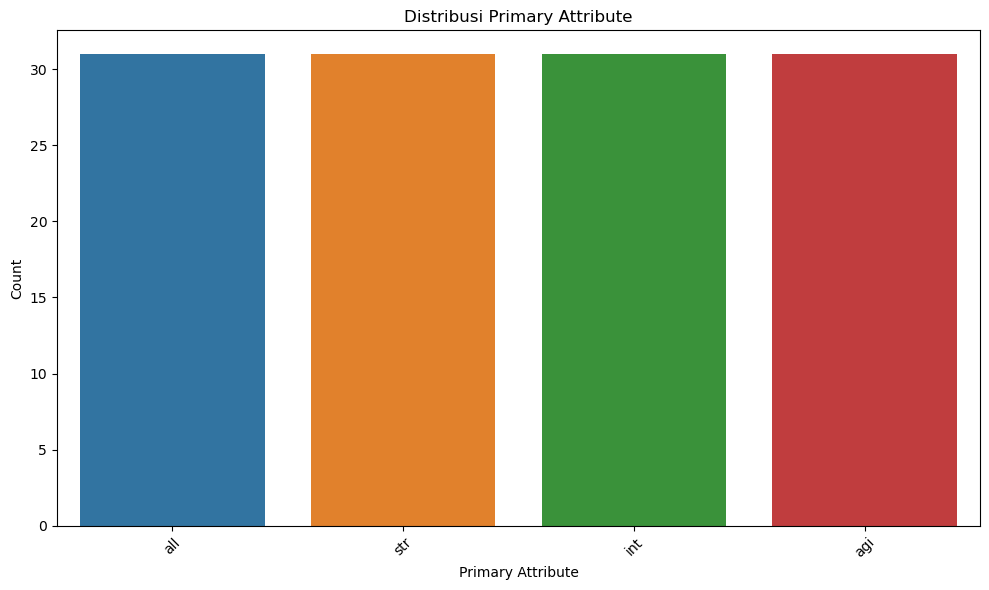

In [12]:
# Buat bar plot untuk visualisasi Distribusi Primary Attribute
plt.figure(figsize=(10, 6))
sns.barplot(x=primary_attribute_counts.index, y=primary_attribute_counts.values)
plt.title('Distribusi Primary Attribute')
plt.xlabel('Primary Attribute')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Distribusi dalam kolom Primary Attribute bisa dibilang normal dan sama rata

##### b. Slicing int

In [13]:
# slicing dataframe untuk mengambil primary attribute int saja
int_pa = df[df['Primary Attribute']=='int']
int_pa

,Name,Primary Attribute,Attack Type,Attack Range,Roles,Total Pro wins,Times Picked,Times Banned,Win Rate,Niche Hero?
2,Ancient Apparition,int,Ranged,675,"Support, Disabler, Nuker",27,53,62,50.94,False
19,Crystal Maiden,int,Ranged,600,"Support, Disabler, Nuker",217,419,64,51.79,True
24,Death Prophet,int,Ranged,600,"Carry, Pusher, Nuker, Disabler",48,96,86,50.00,False
25,Disruptor,int,Ranged,625,"Support, Disabler, Nuker, Initiator",182,366,159,49.73,False
33,Enchantress,int,Ranged,575,"Support, Pusher, Durable, Disabler",145,302,281,48.01,False
36,Grimstroke,int,Ranged,600,"Support, Nuker, Disabler, Escape",30,69,13,43.48,False
40,Invoker,int,Ranged,600,"Carry, Nuker, Disabler, Escape, Pusher",31,74,70,41.89,False
42,Jakiro,int,Ranged,400,"Support, Nuker, Pusher, Disabler",89,179,43,49.72,False
44,Keeper of the Light,int,Ranged,600,"Support, Nuker, Disabler",107,172,91,62.21,True
47,Leshrac,int,Ranged,575,"Carry, Support, Nuker, Pusher, Disabler",116,240,163,48.33,False


In [14]:
int_pa.describe().T

,count,mean,std,min,25%,50%,75%,max
Attack Range,31.0,559.032258,75.436721,380.00,525.000,575.00,600.000,675.00
Total Pro wins,31.0,114.161290,101.463983,9.00,35.000,91.00,152.500,443.00
Times Picked,31.0,227.870968,204.011232,19.00,71.500,172.00,315.500,916.00
Times Banned,31.0,204.451613,192.763212,5.00,67.000,159.00,258.500,684.00
Win Rate,31.0,50.093871,5.311488,40.91,47.625,49.73,52.045,63.64


- Bisa dilihat bahwa:
    - Rata-rata win rate heroes dengan atribut utama int adalah: 50.09
    - Median nya adalah: 49.73
    - Standard Deviation nya adalah: 5.31

##### c. slicing str

In [15]:
# slicing dataframe untuk mengambil primary attribute str saja
str_pa = df[df['Primary Attribute']=='str']
str_pa

,Name,Primary Attribute,Attack Type,Attack Range,Roles,Total Pro wins,Times Picked,Times Banned,Win Rate,Niche Hero?
1,Alchemist,str,Melee,150,"Carry, Support, Durable, Disabler, Initiator, ...",48,109,75,44.04,False
5,Axe,str,Melee,150,"Initiator, Durable, Disabler, Carry",98,224,244,43.75,False
12,Bristleback,str,Melee,150,"Carry, Durable, Initiator, Nuker",4,8,16,50.00,False
14,Centaur Warrunner,str,Melee,150,"Durable, Initiator, Disabler, Nuker, Escape",24,43,17,55.81,True
15,Chaos Knight,str,Melee,150,"Carry, Disabler, Durable, Pusher, Initiator",19,44,18,43.18,False
22,Dawnbreaker,str,Melee,150,"Carry, Durable",52,106,59,49.06,False
26,Doom,str,Melee,200,"Carry, Disabler, Initiator, Durable, Nuker",99,217,281,45.62,False
27,Dragon Knight,str,Melee,150,"Carry, Pusher, Durable, Disabler, Initiator, N...",55,108,59,50.93,True
29,Earth Spirit,str,Melee,150,"Nuker, Escape, Disabler, Initiator, Durable",37,80,36,46.25,False
30,Earthshaker,str,Melee,150,"Support, Initiator, Disabler, Nuker",59,106,48,55.66,True


In [16]:
str_pa.describe().T

,count,mean,std,min,25%,50%,75%,max
Attack Range,31.0,165.322581,48.595876,150.00,150.000,150.00,150.000,400.00
Total Pro wins,31.0,93.548387,102.729041,4.00,30.500,59.00,99.500,384.00
Times Picked,31.0,190.032258,201.373200,8.00,61.000,114.00,225.500,770.00
Times Banned,31.0,188.741935,262.334769,11.00,28.000,73.00,241.500,982.00
Win Rate,31.0,48.546452,5.093957,36.36,44.835,49.87,51.685,57.33


- Bisa dilihat bahwa:
    - Rata-rata win rate heroes dengan atribut utama str adalah: 48.54
    - Median nya adalah: 48.54
    - Standard Deviation nya adalah: 5.09

##### d. slicing agi

In [17]:
# slicing dataframe untuk mengambil primary attribute agi saja
agi_pa = df[df['Primary Attribute']=='agi']
agi_pa

,Name,Primary Attribute,Attack Type,Attack Range,Roles,Total Pro wins,Times Picked,Times Banned,Win Rate,Niche Hero?
3,Anti-Mage,agi,Melee,150,"Carry, Escape, Nuker",57,124,479,45.97,False
4,Arc Warden,agi,Ranged,625,"Carry, Escape, Nuker",9,19,58,47.37,False
9,Bloodseeker,agi,Melee,150,"Carry, Disabler, Nuker, Initiator",209,419,1047,49.88,False
10,Bounty Hunter,agi,Melee,150,"Escape, Nuker",88,142,112,61.97,True
17,Clinkz,agi,Ranged,600,"Carry, Escape, Pusher",74,157,131,47.13,False
28,Drow Ranger,agi,Ranged,625,"Carry, Disabler, Pusher",94,205,297,45.85,False
32,Ember Spirit,agi,Melee,150,"Carry, Escape, Nuker, Disabler, Initiator",292,539,747,54.17,False
35,Faceless Void,agi,Melee,150,"Carry, Initiator, Disabler, Escape, Durable",113,251,562,45.02,False
37,Gyrocopter,agi,Ranged,365,"Carry, Nuker, Disabler",30,51,51,58.82,False
38,Hoodwink,agi,Ranged,575,"Support, Nuker, Escape, Disabler",45,90,60,50.00,True


In [18]:
agi_pa.describe().T

,count,mean,std,min,25%,50%,75%,max
Attack Range,31.0,320.000000,187.714322,150.00,150.00,225.00,500.00,625.00
Total Pro wins,31.0,89.935484,70.253795,9.00,39.00,57.00,132.00,292.00
Times Picked,31.0,180.322581,134.711887,19.00,79.50,124.00,266.50,539.00
Times Banned,31.0,365.612903,311.675224,45.00,101.50,277.00,552.50,1047.00
Win Rate,31.0,48.825161,5.493155,36.67,45.91,49.14,52.13,61.97


- Bisa dilihat bahwa:
    - Rata-rata win rate heroes dengan atribut utama agi adalah: 48.82
    - Median nya adalah: 45.91
    - Standard Deviation nya adalah: 5.49

##### e. slicing all

In [19]:
# slicing dataframe untuk mengambil primary attribute all saja
all_pa = df[df['Primary Attribute']=='all']
all_pa

,Name,Primary Attribute,Attack Type,Attack Range,Roles,Total Pro wins,Times Picked,Times Banned,Win Rate,Niche Hero?
0,Abaddon,all,Melee,150,"Support, Carry, Durable",15,34,80,44.12,False
6,Bane,all,Ranged,400,"Support, Disabler, Nuker, Durable",15,27,64,55.56,False
7,Batrider,all,Ranged,400,"Initiator, Disabler, Escape",184,356,470,51.69,False
8,Beastmaster,all,Melee,150,"Initiator, Disabler, Durable, Nuker",179,342,686,52.34,False
11,Brewmaster,all,Melee,150,"Carry, Initiator, Durable, Disabler, Nuker",26,47,132,55.32,False
13,Broodmother,all,Melee,150,"Carry, Pusher, Escape, Nuker",156,293,943,53.24,False
16,Chen,all,Ranged,650,"Support, Pusher",28,69,183,40.58,False
18,Clockwerk,all,Melee,150,"Initiator, Disabler, Durable, Nuker",214,409,338,52.32,False
20,Dark Seer,all,Melee,150,"Initiator, Escape, Disabler",195,341,557,57.18,False
21,Dark Willow,all,Ranged,475,"Support, Nuker, Disabler, Escape",88,183,135,48.09,False


In [20]:
all_pa.describe().T

,count,mean,std,min,25%,50%,75%,max
Attack Range,31.0,355.806452,198.733896,150.00,150.000,400.00,512.50,700.00
Total Pro wins,31.0,109.129032,91.529501,12.00,27.500,88.00,181.50,368.00
Times Picked,31.0,215.322581,184.684124,22.00,63.500,183.00,341.50,765.00
Times Banned,31.0,374.129032,278.570487,64.00,144.000,338.00,513.50,1065.00
Win Rate,31.0,50.414194,5.633915,38.76,47.285,51.43,54.34,60.31


- Bisa dilihat bahwa:
    - Rata-rata win rate heroes dengan atribut utama all adalah: 50.41
    - Median nya adalah: 51.43
    - Standard Deviation nya adalah: 5.63

#### f. Kesimpulan

- Dilihat dari rata rata win rate masing masing Attribute:
    - Attribute utama yang memiliki Standard Deviasi yang paling tinggi adalah all(universall) dengan 5.63, sedangkat str(strength) memiliki value Standard Deviation yang paling rendah, yaitu 5.09.
    - Jika dilihat dari data di atas, atribut all memiliki rata rata kemenangan terbesar, dengan 50.41


- Maka bisa disimpulkan bahwa, Hero dengan Primary Attribute all memiliki Win Rate yang lebih tinggi dari yang lain.

## 2. Hubungan antara Attack Type dan Win Rate

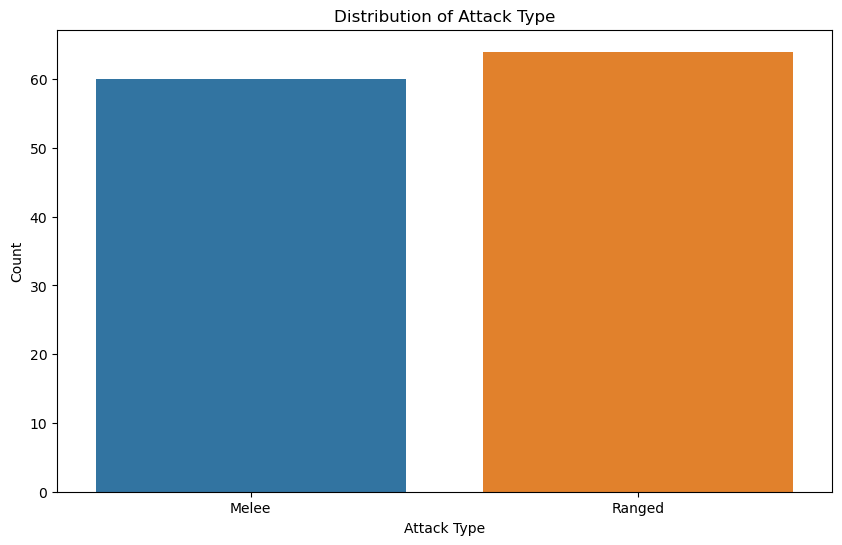

In [21]:
# Membuat visualisasi dari distribusi 'Attack Type' menggunakan countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Attack Type', data=df)
plt.title('Distribution of Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()

- Distribusi pada kolom Attack Type tidak sama rata

In [22]:
# Menunjukan value count dari attack type
attack_type_count = df['Attack Type'].value_counts()
attack_type_count

Ranged    64
Melee     60
Name: Attack Type, dtype: int64

In [23]:
# kalkulasi central tendency measures dan measures of variability untuk setiap Atttack Type
attribute_groups = df.groupby('Attack Type')['Win Rate']
central_tendency = attribute_groups.agg(['mean', 'median', lambda x: x.mode().iloc[0]])
measures_of_variability = attribute_groups.agg(['std', 'min', 'max'])

# print result nya
result_df = pd.concat([central_tendency, measures_of_variability], axis=1)
result_df.columns = ['Mean', 'Median', 'Mode', 'Standard Deviation', 'Min', 'Max']
print(result_df)

                  Mean  Median   Mode  Standard Deviation    Min    Max
Attack Type                                                            
Melee        49.081333  49.545  46.25            5.619313  36.36  61.97
Ranged       49.834219  49.865  50.00            5.165112  36.67  63.64


- Tipe Attack yang memiliki Standard Deviasi yang paling tinggi adalah Melee dengan 5.61, sedangkat Ranged memiliki value Standard Deviation yang paling rendah, yaitu 5.16.

- Jika dilihat dari data di atas, Ranged memiliki rata rata kemenangan terbesar, dengan 49.83.

In [24]:
# slicing dataframe untuk mengambil attack type melee saja
melee_at = df[df['Attack Type']=='Melee']
melee_at

,Name,Primary Attribute,Attack Type,Attack Range,Roles,Total Pro wins,Times Picked,Times Banned,Win Rate,Niche Hero?
0,Abaddon,all,Melee,150,"Support, Carry, Durable",15,34,80,44.12,False
1,Alchemist,str,Melee,150,"Carry, Support, Durable, Disabler, Initiator, ...",48,109,75,44.04,False
3,Anti-Mage,agi,Melee,150,"Carry, Escape, Nuker",57,124,479,45.97,False
5,Axe,str,Melee,150,"Initiator, Durable, Disabler, Carry",98,224,244,43.75,False
8,Beastmaster,all,Melee,150,"Initiator, Disabler, Durable, Nuker",179,342,686,52.34,False
9,Bloodseeker,agi,Melee,150,"Carry, Disabler, Nuker, Initiator",209,419,1047,49.88,False
10,Bounty Hunter,agi,Melee,150,"Escape, Nuker",88,142,112,61.97,True
11,Brewmaster,all,Melee,150,"Carry, Initiator, Durable, Disabler, Nuker",26,47,132,55.32,False
12,Bristleback,str,Melee,150,"Carry, Durable, Initiator, Nuker",4,8,16,50.00,False
13,Broodmother,all,Melee,150,"Carry, Pusher, Escape, Nuker",156,293,943,53.24,False


In [25]:
melee_at.describe().T

,count,mean,std,min,25%,50%,75%,max
Attack Range,60.0,158.333333,26.707243,150.00,150.0000,150.000,150.000,300.00
Total Pro wins,60.0,100.083333,91.038322,4.00,37.0000,68.500,142.000,384.00
Times Picked,60.0,200.183333,176.947229,8.00,78.7500,137.500,269.250,770.00
Times Banned,60.0,315.100000,318.419066,11.00,59.7500,178.000,498.500,1065.00
Win Rate,60.0,49.081333,5.619313,36.36,44.9075,49.545,52.905,61.97


In [26]:
# slicing dataframe untuk mengambil attack type ranged saja
ranged_at = df[df['Attack Type']=='Ranged']
ranged_at

,Name,Primary Attribute,Attack Type,Attack Range,Roles,Total Pro wins,Times Picked,Times Banned,Win Rate,Niche Hero?
2,Ancient Apparition,int,Ranged,675,"Support, Disabler, Nuker",27,53,62,50.94,False
4,Arc Warden,agi,Ranged,625,"Carry, Escape, Nuker",9,19,58,47.37,False
6,Bane,all,Ranged,400,"Support, Disabler, Nuker, Durable",15,27,64,55.56,False
7,Batrider,all,Ranged,400,"Initiator, Disabler, Escape",184,356,470,51.69,False
16,Chen,all,Ranged,650,"Support, Pusher",28,69,183,40.58,False
...,...,...,...,...,...,...,...,...,...,...
118,Weaver,agi,Ranged,425,"Carry, Escape",35,74,227,47.30,False
119,Windranger,all,Ranged,600,"Carry, Support, Disabler, Escape, Nuker",216,420,836,51.43,False
120,Winter Wyvern,all,Ranged,425,"Support, Disabler, Nuker",27,53,313,50.94,False
121,Witch Doctor,int,Ranged,550,"Support, Nuker, Disabler",39,69,17,56.52,True


In [27]:
ranged_at.describe().T

,count,mean,std,min,25%,50%,75%,max
Attack Range,64.0,529.765625,98.385497,200.00,475.0000,550.000,600.000,700.00
Total Pro wins,64.0,103.203125,93.301556,9.00,30.7500,72.000,145.000,443.00
Times Picked,64.0,206.390625,188.112396,19.00,69.0000,149.500,272.000,916.00
Times Banned,64.0,253.359375,227.379786,5.00,85.0000,179.500,364.750,997.00
Win Rate,64.0,49.834219,5.165112,36.67,47.3525,49.865,52.315,63.64


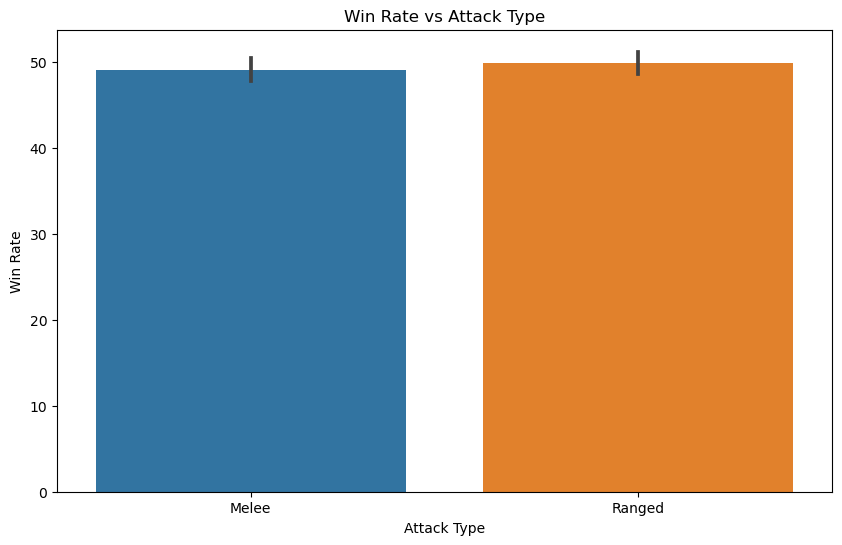

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Attack Type', y='Win Rate', data=df)
plt.title('Win Rate vs Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Win Rate')
plt.show()

- Bisa dilihat dari boxplot diatas, garis tengah (median) dari kedua attack type memiliki value yang hampir sama, ini menandakan bahwa Win Rate antara kedua Attack Type itu hampir sama, dan tidak ada perbedaan yang signifikan.

- Rata-rata Win Rate Ranged adalah 49.83, sedangkan Melee 49.08.

##### Hipotesis

- H0: Tidak ada hubungan antara Attack Type dan Win Rate
- H1: Ada hubungan antara Attack Type dan Win Rate

In [47]:
t_stat, p_val = stats.ttest_ind(melee_at['Win Rate'],ranged_at['Win Rate'])
print('T-Statistic:',t_stat)
print('P-value:',p_val)

T-Statistic: -0.7773763386204405
P-value: 0.4384415754775405


p-value: 0.43 , menandakan tidak adanya korelasi yang signifikan antara kedua variabel

Melihat hasil data di atas, bisa di artikan bahwa kita gagal menolak H0, dan bisa di bilang juga bahwa tidak ada korelasi atau hubungan antara Primary Attribute dan Win Rate

## 3. Apa role yang paling umum di antara hero ? 

In [31]:
# Hitung jumlah kemunculan setiap individual role
split_role_counts = df['Roles'].str.split(',').explode().str.strip().value_counts()
split_role_counts

Disabler     92
Nuker        88
Carry        71
Initiator    55
Escape       51
Durable      49
Support      46
Pusher       29
Name: Roles, dtype: int64

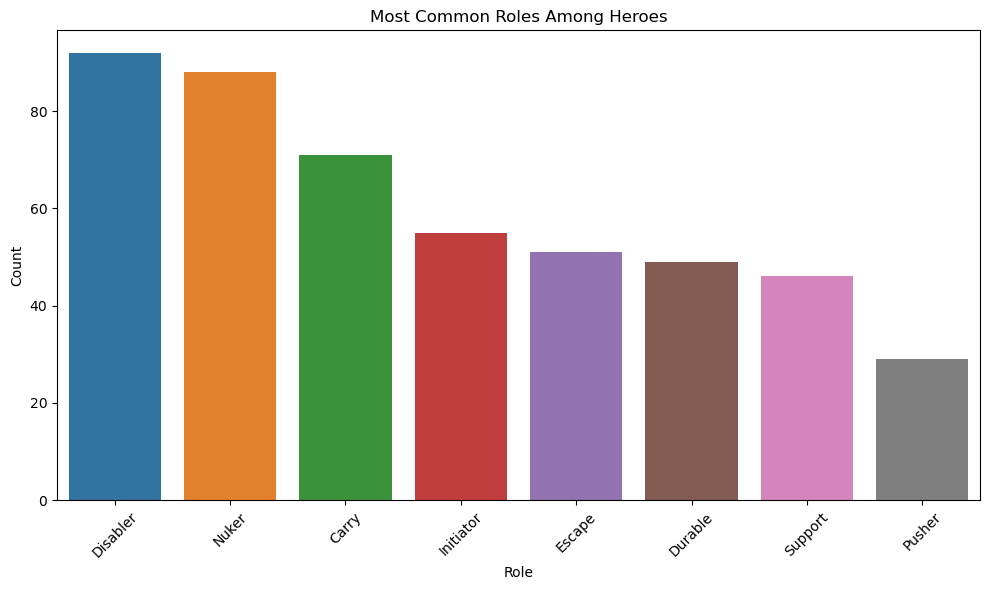

In [32]:
# Membuat barplot untuk mengvisualisasikan beberapa role yang paling umum 
plt.figure(figsize=(10, 6))
sns.barplot(x=split_role_counts.index, y=split_role_counts.values)
plt.title('Most Common Roles Among Heroes')
plt.xlabel('Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
# Spesifikasi file path dimana CSV file akan disimpan
csv_file_path = '/Users/andhikanafis/Desktop/Hactiv8/Milestone/split_role_counts.csv'


# Simpan table nya kedalam bentuk csv
split_role_counts.to_csv(csv_file_path, index=True)

# Ini dipakai untuk data di Tableau

### Kesimpulan

- Ada 92 hero yang memiliki role Disabler, dan ini menjadi kan Disabler sebagai Role yangpaling umum.

## 4. Apakah hero yang memiliki role yang paling umum menentukan rata-rata Win Rate yang tinggi ? (Sebisa mungkin di pisah)  

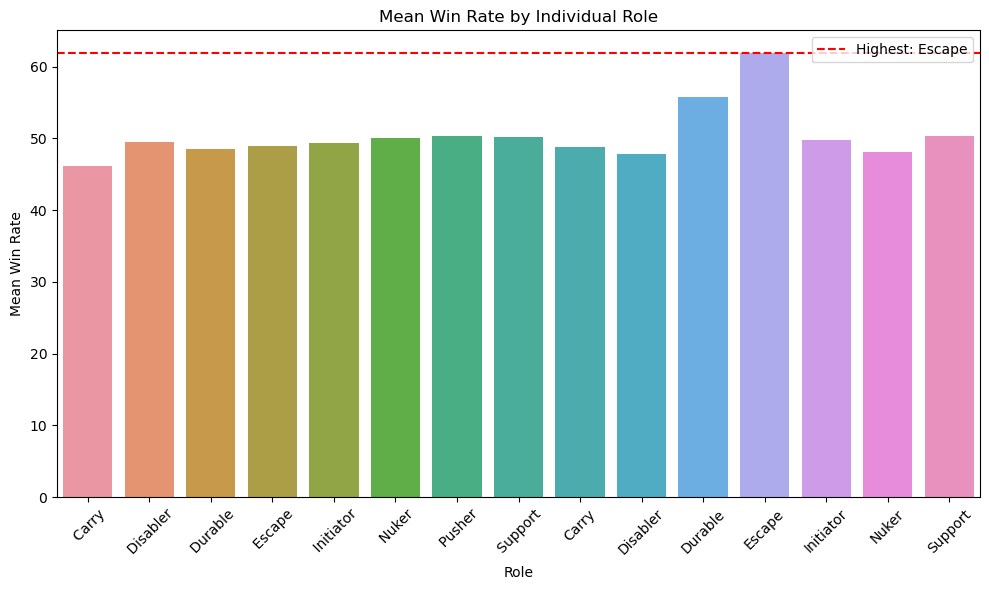

In [34]:
# Split the "Roles" column into separate roles
df['Roles'] = df['Roles'].str.split(',')

# Explode the dataframe to have each role in a separate row
df_roles = df.explode('Roles')

# Kalkulasi rata rata win rate untuk setiap individual role
role_mean_win_rate = df_roles.groupby('Roles')['Win Rate'].mean().reset_index()

# Menemukan role individual dengan rata rata win rate tertinggi
max_win_rate_role = role_mean_win_rate.loc[role_mean_win_rate['Win Rate'].idxmax()]

# Membuat barplot dengan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Roles', y='Win Rate', data=role_mean_win_rate)
plt.title('Mean Win Rate by Individual Role')
plt.xlabel('Role')
plt.ylabel('Mean Win Rate')
plt.xticks(rotation=45)
plt.axhline(y=max_win_rate_role['Win Rate'], color='r', linestyle='--', label=f'Highest: {max_win_rate_role["Roles"]}')
plt.legend()
plt.tight_layout()
plt.show()

In [35]:
max_win_rate_role

Roles       Escape
Win Rate     61.97
Name: 11, dtype: object

In [36]:
# Spesifikasi file path dimana CSV file akan disimpan
csv_file_path = '/Users/andhikanafis/Desktop/Hactiv8/Milestone/role_mean_win_rate.csv'


# Simpan table menjadi CSV file
role_mean_win_rate.to_csv(csv_file_path, index=True)

# Ini dipakai untuk data di Tableau

### Kesimpulan

- Role dengan rata-rata Win Rate tertinggi adalah Escape, dengan win rate 61.97%
- Hero yang memiliki roles yang umum, tidak memastikan win rate yang tinggi, bisa dilihat bahwa meskipun Disabler adalah roles yang paling umum, tapi Disabler hanya memiliki rata-rata win rate 47.83%

## 5. Hero Apa saja yang memiliki rata-rata Win Rate terbesar ?

In [37]:
# Tunjukan 5 hero yang memiliki nilai tertinggi dalam Total Pro Wins
top10_hero = df.nlargest(10, 'Win Rate')
print("Top 10 hero dengan nilai tertinggi dalam Total Pro Wins: ")
print(top10_hero[['Name', 'Win Rate']])

Top 10 hero dengan nilai tertinggi dalam Total Pro Wins: 
                    Name  Win Rate
88         Shadow Shaman     63.64
44   Keeper of the Light     62.21
10         Bounty Hunter     61.97
41                    Io     60.31
85             Sand King     59.09
54                 Lycan     59.04
37            Gyrocopter     58.82
122          Wraith King     57.33
20             Dark Seer     57.18
121         Witch Doctor     56.52


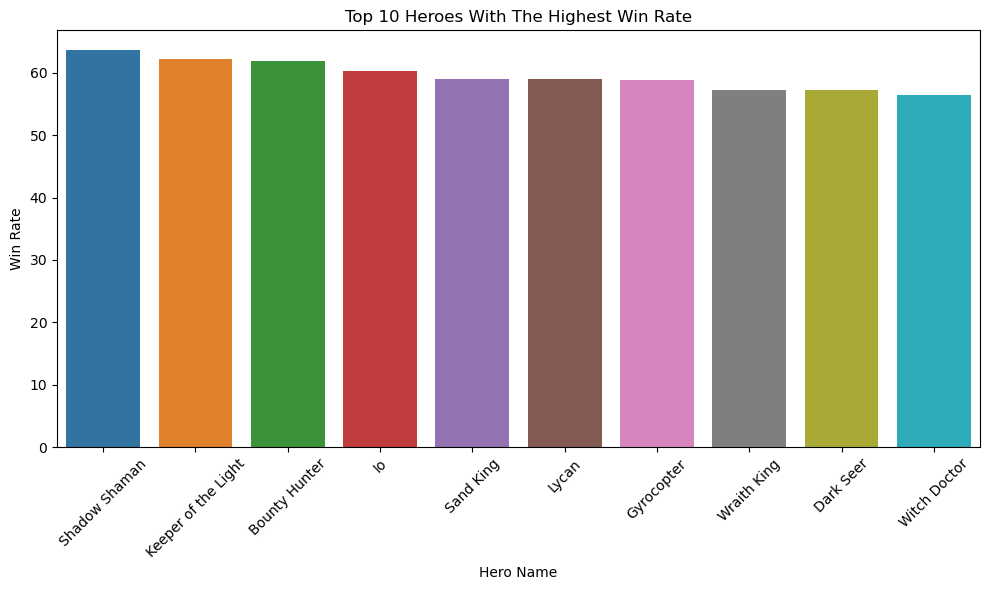

In [38]:
# Visualisasi dengan barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Name', y='Win Rate', data=top10_hero)
plt.title('Top 10 Heroes With The Highest Win Rate')
plt.xlabel('Hero Name')
plt.ylabel('Win Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
# Spesifikasi nama hero yang ingin di panggil
SS = "Shadow Shaman"  

# Digunakan untuk menunjukan informasi mengenai hero yang di panggil
hero_info = df[df['Name'] == SS]

print("Hero Information:")
print(hero_info)

Hero Information:
             Name Primary Attribute Attack Type  Attack Range  \
88  Shadow Shaman               int      Ranged           400   

                                                Roles  Total Pro wins  \
88  [Support,  Pusher,  Disabler,  Nuker,  Initiator]              14   

    Times Picked  Times Banned  Win Rate  Niche Hero?  
88            22             5     63.64         True  


In [40]:
KOTL = "Keeper of the Light"  #Memunculkan informasi mengenai hero yang spesifik
hero_info = df[df['Name'] == KOTL]

print("Hero Information:")
print(hero_info)

Hero Information:
                   Name Primary Attribute Attack Type  Attack Range  \
44  Keeper of the Light               int      Ranged           600   

                           Roles  Total Pro wins  Times Picked  Times Banned  \
44  [Support,  Nuker,  Disabler]             107           172            91   

    Win Rate  Niche Hero?  
44     62.21         True  


In [41]:
BH = "Bounty Hunter"  #Memunculkan informasi mengenai hero yang spesifik
hero_info = df[df['Name'] == BH]

print("Hero Information:")
print(hero_info)

Hero Information:
             Name Primary Attribute Attack Type  Attack Range  \
10  Bounty Hunter               agi       Melee           150   

               Roles  Total Pro wins  Times Picked  Times Banned  Win Rate  \
10  [Escape,  Nuker]              88           142           112     61.97   

    Niche Hero?  
10         True  


In [49]:
IO = "Io"  #Memunculkan informasi mengenai hero yang spesifik
hero_info = df[df['Name'] == IO]

print("Hero Information:")
print(hero_info)

Hero Information:
   Name Primary Attribute Attack Type  Attack Range  \
41   Io               all      Ranged           500   

                         Roles  Total Pro wins  Times Picked  Times Banned  \
41  [Support,  Escape,  Nuker]             117           194           360   

    Win Rate  Niche Hero?  
41     60.31        False  


### Kesimpulan

- Hero yang memiliki win rate terbesar adalah Shadow Shaman dengan win rate 63.64%.
- Di ikuti oleh Keeper of the Light dengan Win Rate 62.21%.

## 6. Apakah hero dengan status "Niche Hero" memiliki Win Rate yang lebih tinggi dari hero dengan status "Non Niche Hero" ?

In [42]:
# Hitung total kemunculan dari Niche Hero dan Non Niche Hero
niche_hero_counts = df['Niche Hero?'].value_counts()
niche_hero_counts

False    105
True      19
Name: Niche Hero?, dtype: int64

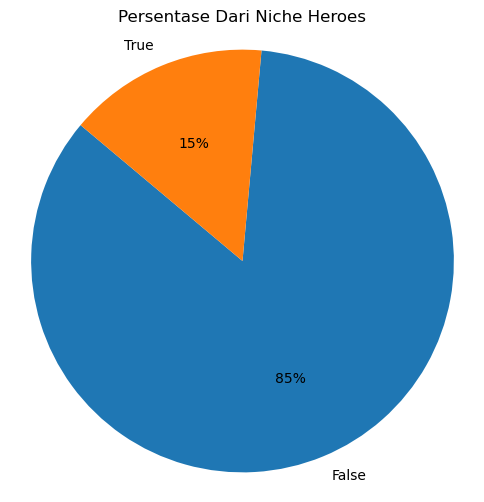

In [43]:
# Buat pie chart untuk mevisualisasikan distribusi dari Niche Heroes
plt.figure(figsize=(6, 6))
plt.pie(niche_hero_counts, labels=niche_hero_counts.index, autopct='%.0f%%', startangle=140)
plt.title('Persentase Dari Niche Heroes')
plt.axis('equal') 
plt.show()

- Hanya 15% dari total hero dalam Dota 2 pada meta ini yang memiliki status 'Niche Hero'

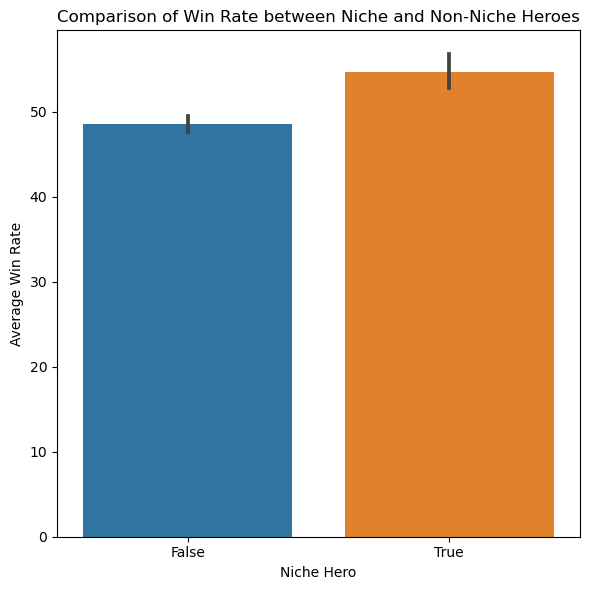

In [44]:
# Buat bar plot untuk membandingkan rata rata Win Rate antara hero berstatus Niche Hero dan Non Niche Hero
plt.figure(figsize=(6, 6))
sns.barplot(x='Niche Hero?', y='Win Rate', data=df)
plt.title('Comparison of Win Rate between Niche and Non-Niche Heroes')
plt.xlabel('Niche Hero')
plt.ylabel('Average Win Rate')
plt.tight_layout()
plt.show()

In [45]:
# Hitung mean/rata-rata Win Rate untuk setiap Niche Hero
nichehero_win_rate_mean = df.groupby('Niche Hero?')['Win Rate'].mean()

# Urutkan hasil nya berdasarkan mean win rate yang terbesar
sorted_nichehero_win_rate_mean  = nichehero_win_rate_mean .sort_values(ascending=False)

print(sorted_nichehero_win_rate_mean)

Niche Hero?
True     54.641579
False    48.534095
Name: Win Rate, dtype: float64


- Hero dengan status 'Niche Hero' memiliki persentase Win Rate yang lebih tinggi dari yang 'Non Niche Hero' dengan nilai 54.64

# E. Recap

1. Apakah Hero dengan Primary Attribute all memiliki Win Rate yang lebih tinggi dari yang lain ?
    - Iya, Primary Attribute all, dengan Win Rate rata-rata 50.41.
2. Apakah ada hubungan antara Attack Type dan Win Rate ?
    - Tidak ada korelasi atau hubungan antara kedua variable, ini dibuktikan dengan Test ANOVA dengan hasil p-value: 0.43844157547753926.
3. Apa role yang paling umum di antara hero ?  ? 
    - Ada 92 hero di Dota 2 yang memiliki role Disabler, dan ini menjadi kan Disabler sebagai Role yangpaling umum.
4. Apakah hero yang memiliki role yang paling umum menentukan Win Rate yang tinggi ?
    - Hero yang memiliki roles yang umum, tidak memastikan win rate yang tinggi, bisa dilihat bahwa meskipun Disabler adalah roles yang paling umum, tapi Disabler hanya memiliki rata-rata win rate 47.83%, Role dengan rata-rata Win Rate tertinggi adalah Escape, dengan win rate 61.97%
5. Hero Apa saja yang memiliki Win Rate tertinggi ?
    - Hero yang memiliki win rate tertinggi, adalah Shadow Shaman, dengan Win Rate 63.64%, dan di ikuti oleh Keeper of the Light dengan Win Rate 62.21%.
6. Apakah hero dengan status "Niche Hero" memiliki Win Rate yang lebih tinggi dari hero dengan status "Non Niche Hero" ?
    - 85% hero di Dota 2 tidak masuk dalam status/kategori 'Niche Hero', tapi hero dengan status 'Niche Hero' memiliki persentase Win Rate yang lebih tinggi dari yang 'Non Niche Hero' dengan nilai 54.64

# F. Insight untuk industry profesional Dota 2

Dari analisa diatas, kita bisa mendapat insight:
Meski roles yang umum adalah Disabler, tetapi role hero yang memiliki rata-rata win rate terbesar adalah Escape, jika ingin memiliki kesempatan menang yang tinggi, maka harus mengikuti META terkini. Untuk membantu mencapai tujuan itu, kita harus mencari hero Escape, dengan Primary Attribute All, dan Win Rate nya masih masuk kedalam top 10 highest win rate. Kriteria tersebut dipenuhi oleh hero Sand King.

Walaupun Sand King tidak berstatus Niche Hero, tapi Sand King adalah hero yang memiliki role Escape dan Disabler, dan juga Sand King memiliki win rate yang cukup tinggi, sampai masuk kedalam top 5 hero dengan win rate tertinggi di META ini.

Berdasarkan data yang terkumpul, sangat disarankan untuk menjadikan Sand King sebagai Priority Pick saat ingin menentukan hero untuk dimainkan.

- Info spesifik mengenai Sand King akan ditampilkan dibawah ini.



In [46]:
SK = "Sand King"  
hero_info = df[df['Name'] == SK]

print("Hero Information:")
print(hero_info)

Hero Information:
         Name Primary Attribute Attack Type  Attack Range  \
85  Sand King               all       Melee           150   

                                                Roles  Total Pro wins  \
85  [Initiator,  Disabler,  Support,  Nuker,  Escape]              13   

    Times Picked  Times Banned  Win Rate  Niche Hero?  
85            22           133     59.09        False  


# G. Kesimpulan

Jika ingin memiliki kesempatan menang yang lebih besar, sebuah tim harus mengikuti hero hero yang sedang META, banyak pertimbangan yang harus di lihat, seperti Primary Attribute, Role, dan Win Rate. Hanya ada 1 Hero yang cocok dengan semua kriteria tersebut, yaitu Sand King.